# Daily Household Transactions

#### About Dataset
The "Daily Transactions" dataset contains information on dummy transactions made by
an individual on a daily basis. The dataset includes data on the products that were
purchased, the amount spent on each product, the date and time of each transaction,
the payment mode of each transaction, and the source of each record
(Expense/Income).
This dataset can be used to analyze purchasing behavior and money management,
forecasting expenses, and optimizing savings and budgeting strategies. The dataset is
well-suited for data analysis and machine learning applications,it can be used to train
predictive models and make data-driven decisions

### Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Daily Household Transactions.csv')

df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [3]:
df.tail()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR
2460,1/1/2015,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


#### Column Descriptors
* `Date`: The date and time when the transaction was made
* `Mode`: The payment mode used for the transaction
* `Category`: Each record is divided into a set of categories of transactions
* `Subcategory`: Categories are further broken down into Subcategories of transactions
* `Note`: A brief description of the transaction made
* `Amount`: The transactional amount
* `Income/Expense`: The indicator of each transaction representing either expense or income
* `Currency`: All transactions are recorded in official currency of India

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [5]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


### Step 1.2: convert Data Types

In [6]:
df["Date"] = pd.to_datetime(df["Date"], format='mixed', dayfirst=True)

In [7]:
df["Date"]

0      2018-09-20 12:04:08
1      2018-09-20 12:03:15
2      2018-09-19 00:00:00
3      2018-09-17 23:41:17
4      2018-09-16 17:15:08
               ...        
2456   2015-01-01 00:00:00
2457   2015-01-01 00:00:00
2458   2015-01-01 00:00:00
2459   2015-01-01 00:00:00
2460   2015-01-01 00:00:00
Name: Date, Length: 2461, dtype: datetime64[ns]

### Step 1.3: Handle Missing Value

In [8]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [9]:
# Fill or missing values
df['Subcategory'] = df['Subcategory'].fillna('Unknown')
df['Note'] = df['Note'].fillna('Not Specified')

In [10]:
df.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

### Step 1.4: Remove Duplicates

In [11]:
df.duplicated().sum()

9

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

### Step 1.5: Standardize Categorical Data

In [14]:
# Convert to lowercase and strip whitespace
df['Category'] = df['Category'].str.strip().str.lower()
df['Subcategory'] = df['Subcategory'].str.strip().str.lower()
df['Mode'] = df['Mode'].str.strip().str.lower()
df['Income/Expense'] = df['Income/Expense'].str.strip()

# Fix specific inconsistencies in Subcategory
subcategory_mapping = {
    'train': 'train',
    'auto': 'auto',
    'pocket money': 'pocket money',
    'laundry': 'laundry',
    'breakfast': 'breakfast',
    'dinner': 'dinner',
    'lunch': 'lunch',
    'snacks': 'snacks',
    'tea': 'tea',
    'groceries': 'grocery',
    'kirana': 'grocery',
    'vegetables': 'grocery',
    'fruits': 'grocery',
    'milk': 'grocery',
    'curd': 'grocery',
    'eggs': 'grocery',
    'bread': 'grocery',
    'biscuits': 'grocery',
    'chocolate': 'grocery',
    'beverage': 'grocery',
    'water': 'grocery',
    'potato': 'grocery',
    'onions': 'grocery',
    'sweets': 'grocery',
    'ice cream': 'grocery',
    'rajgira ladu': 'grocery',
    'clothing': 'clothing',
    'clothes': 'clothing',
    'footwear': 'clothing',
    'accessories': 'clothing',
    'makeup': 'beauty',
    'grooming': 'beauty',
    'saloon': 'beauty',
    'medicine': 'health',
    'hospital': 'health',
    'lab tests': 'health',
    'medicine': 'health',
    'taxi': 'taxi',
    'bus': 'bus',
    'travels': 'travel',
    'trip': 'travel',
    'petrol': 'fuel',
    'mahanagar gas': 'fuel',
    'netflix': 'ott',
    'hotstar': 'ott',
    'amazon prime': 'ott',
    'kindle unlimited': 'ott',
    'audible': 'ott',
    'tata sky': 'cable tv',
    'cable tv': 'cable tv',
    'wifi internet service': 'internet',
    'mobile service provider': 'mobile',
    'public provident fund': 'ppf',
    'mutual fund': 'mutual fund',
    'rd': 'recurring deposit',
    'lic': 'life insurance',
    'exam fee': 'education',
    'school supplies': 'education',
    'edtech course': 'education',
    'books': 'education',
    'newspaper': 'education',
    'stationary': 'education',
    'gift': 'gift',
    'unknown': 'unknown',
    'misc': 'misc',
    'other': 'other'
}
df['Subcategory_Clean'] = df['Subcategory'].map(subcategory_mapping).fillna(df['Subcategory'])

### Step 1.6: Create High-Level Categories 

In [15]:
# Define category type mapping (as previously discussed)
category_type_mapping = {
    # --- Expenses ---
    'transportation': 'Expense',
    'food': 'Expense',
    'subscription': 'Expense',
    'festivals': 'Expense',
    'family': 'Expense',
    'apparel': 'Expense',
    'household': 'Expense',
    'beauty': 'Expense',
    'health': 'Expense',
    'maid': 'Expense',
    'culture': 'Expense',
    'tourism': 'Expense',
    'self-development': 'Expense',
    'education': 'Expense',
    'petty cash': 'Expense',
    'documents': 'Expense',
    'social life': 'Expense',
    'grooming': 'Expense',
    'rent': 'Expense',
    'cook': 'Expense',
    'garbage disposal': 'Expense',
    'water (jar /tanker)': 'Expense',
    'other': 'Expense', # Assuming 'other' is an expense

    # --- Income ---
    'salary': 'Income',
    'gift': 'Income',
    'dividend earned on shares': 'Income',
    'interest': 'Income',
    'tax refund': 'Income',
    'amazon pay cashback': 'Income',
    'gpay reward': 'Income',
    'maturity amount': 'Income', # This is return of capital, not profit
    'bonus': 'Income',

    # --- Investments (Capital Allocation) ---
    # Purchases are negative cash flow, sales are positive.
    'small cap fund 2': 'Investment',
    'small cap fund 1': 'Investment',
    'equity mutual fund a': 'Investment',
    'equity mutual fund b': 'Investment',
    'equity mutual fund c': 'Investment',
    'equity mutual fund d': 'Investment',
    'equity mutual fund e': 'Investment',
    'equity mutual fund f': 'Investment',
    'public provident fund': 'Investment',
    'fixed deposit': 'Investment', # Consider for Net Worth, not Income
    'recurring deposit': 'Investment',
    'share market': 'Investment',
    'investment': 'Investment',

    # --- Transfers (Movement between your accounts) ---
    # Net effect on Net Worth is zero.
    'saving bank account 1': 'Transfer',
    'saving bank account 2': 'Transfer',
    'money transfer': 'Transfer',
    'scrap': 'Transfer', # Likely selling an asset for scrap value
}

df['Category_Type'] = df['Category'].map(category_type_mapping)
df['Category_Type'] = df['Category_Type'].fillna('Expense')  # Default to Expens

In [16]:
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Subcategory_Clean,Category_Type
0,2018-09-20 12:04:08,cash,transportation,train,2 Place 5 to Place 0,30.0,Expense,INR,train,Expense
1,2018-09-20 12:03:15,cash,food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,snacks,Expense
2,2018-09-19 00:00:00,saving bank account 1,subscription,netflix,1 month subscription,199.0,Expense,INR,ott,Expense
3,2018-09-17 23:41:17,saving bank account 1,subscription,mobile service provider,Data booster pack,19.0,Expense,INR,mobile,Expense
4,2018-09-16 17:15:08,cash,festivals,ganesh pujan,Ganesh idol,251.0,Expense,INR,ganesh pujan,Expense
...,...,...,...,...,...,...,...,...,...,...
2456,2015-01-01 00:00:00,cash,transportation,unknown,share jeep - Place T base to top,20.0,Expense,INR,unknown,Expense
2457,2015-01-01 00:00:00,cash,transportation,unknown,share auto - Place H to Place T base,20.0,Expense,INR,unknown,Expense
2458,2015-01-01 00:00:00,cash,transportation,unknown,bus - brc to Place H,30.0,Expense,INR,unknown,Expense
2459,2015-01-01 00:00:00,cash,food,unknown,tea,10.0,Expense,INR,unknown,Expense


### Step 1.7: Seperate Income and Expenses

In [17]:
# Create separate DataFrames
expenses_df = df[df['Income/Expense'] == 'Expense'].copy()
income_df = df[df['Income/Expense'] == 'Income'].copy()

print(f"Total expenses: {len(expenses_df)} transactions")
print(f"Total income: {len(income_df)} transactions")

Total expenses: 2173 transactions
Total income: 125 transactions


## Phase 2: Exploratory Data Analysis (EDA)

#### Goal: Understand spending patterns, income sources, and financial behavior

### Step 2.1: Calculate Key Financial Metrics

In [18]:
# Basic financial health metrics
total_income = income_df['Amount'].sum()
total_expenses = expenses_df['Amount'].sum()
net_savings = total_income - total_expenses
savings_rate = (net_savings / total_income) * 100

print(f"Total Income: ₹{total_income:,.2f}")
print(f"Total Expenses: ₹{total_expenses:,.2f}")
print(f"Net Savings: ₹{net_savings:,.2f}")
print(f"Savings Rate: {savings_rate:.1f}%")

Total Income: ₹3,042,397.35
Total Expenses: ₹1,955,380.53
Net Savings: ₹1,087,016.82
Savings Rate: 35.7%


### Step 2.2: Analyze Trends Over Time

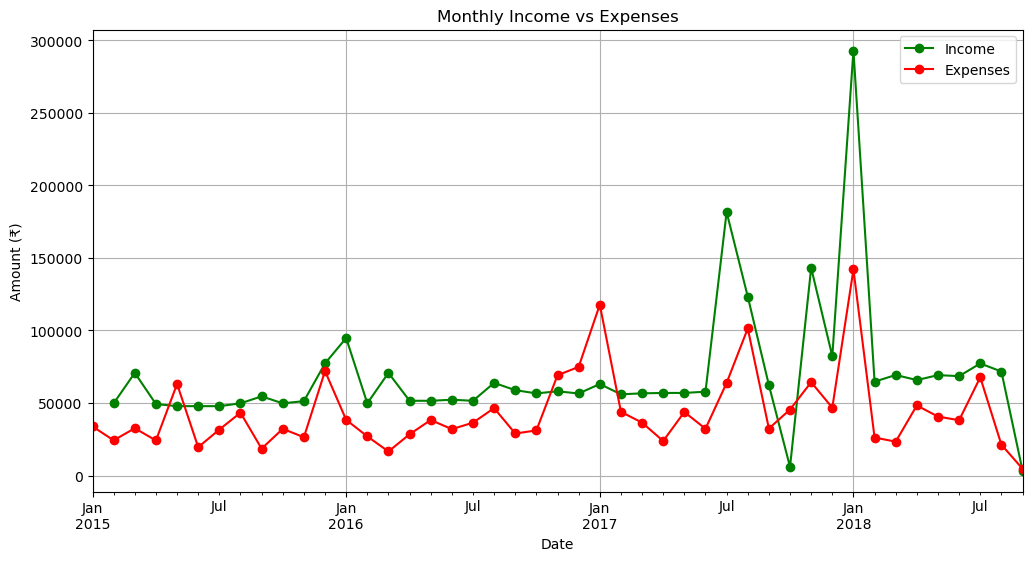

In [19]:
# Set date as index for time series analysis
expenses_df.set_index('Date', inplace=True)
income_df.set_index('Date', inplace=True)

# Monthly trends
monthly_expenses = expenses_df['Amount'].resample('ME').sum()
monthly_income = income_df['Amount'].resample('ME').sum()

# Plot income vs expenses
plt.figure(figsize=(12, 6))
monthly_income.plot(label='Income', color='green', marker='o')
monthly_expenses.plot(label='Expenses', color='red', marker='o')
plt.title('Monthly Income vs Expenses')
plt.ylabel('Amount (₹)')
plt.legend()
plt.grid(True)
plt.show()

### Step 2.3: Category Analysis

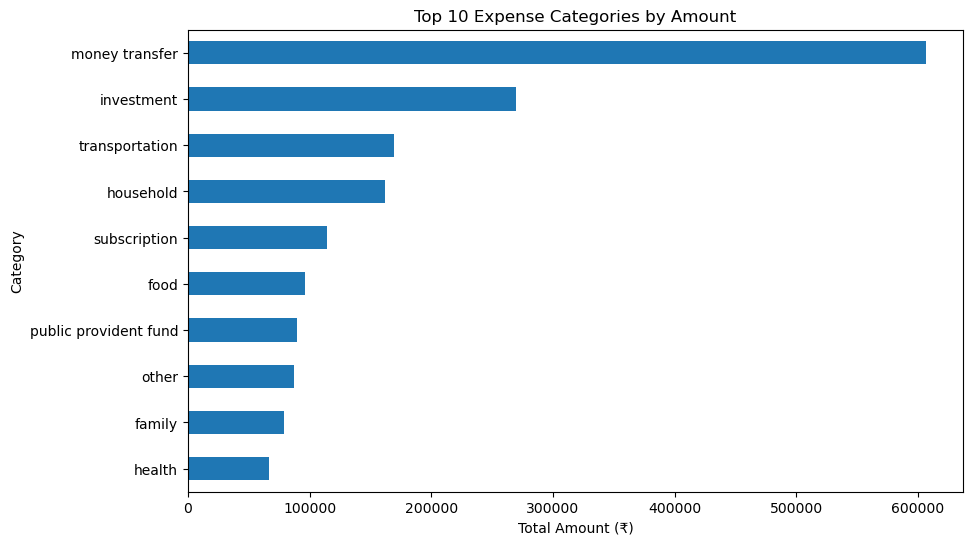

In [20]:
# Top expense categories
top_categories = expenses_df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='barh')
plt.title('Top 10 Expense Categories by Amount')
plt.xlabel('Total Amount (₹)')
plt.gca().invert_yaxis()
plt.show()

### Step 2.4: Payment Mode Analysis

In [23]:
# Analyze spending by payment method
mode_analysis = expenses_df.groupby('Mode').agg(
    Total_Spent=('Amount', 'sum'),
    Transaction_Count=('Amount', 'count'),
    Avg_Transaction=('Amount', 'mean')
).sort_values('Total_Spent', ascending=False)

print("Spending by Payment Mode:")
print(mode_analysis)

Spending by Payment Mode:
                       Total_Spent  Transaction_Count  Avg_Transaction
Mode                                                                  
saving bank account 1   1575728.46                969      1626.138762
credit card              205254.01                162      1267.000062
cash                     173421.00               1038       167.072254
debit card                  942.36                  2       471.180000
saving bank account 2        34.70                  2        17.350000


### Step 2.5: Subcategory Drill-Down

In [24]:
# Analyze specific category in detail
food_spending = expenses_df[expenses_df['Category'] == 'food']
food_breakdown = food_spending.groupby('Subcategory_Clean').agg(
    Total_Spent=('Amount', 'sum'),
    Transaction_Count=('Amount', 'count')
).sort_values('Total_Spent', ascending=False)

print("Food Spending Breakdown:")
print(food_breakdown)

Food Spending Breakdown:
                   Total_Spent  Transaction_Count
Subcategory_Clean                                
grocery               40992.80                484
dinner                22903.10                 55
lunch                 11390.45                 68
unknown                8286.00                 85
snacks                 5980.75                115
eating out             2868.00                  8
flour mill             2007.00                 20
breakfast              1127.00                 29
tea                     838.00                 42


## Phase 3: Forecasting Model Building

#### Goal: Create a predictive model for future expenses.

### Step 3.1: Prepare Data for Modeling

In [26]:
# Create monthly expense data
monthly_expenses_series = expenses_df['Amount'].resample('ME').sum()

# Convert to DataFrame for modeling
model_df = monthly_expenses_series.reset_index()
model_df.columns = ['Date', 'Total_Expenses']

### Step 3.2: Install and Import Prophet

In [29]:
# Install Facebook Prophet if needed
#!pip install prophet

In [30]:
from prophet import Prophet

### Step 3.3: Train-Test Split

In [31]:
# Split into training and testing sets
train_size = int(len(model_df) * 0.8)
train_data = model_df.iloc[:train_size]
test_data = model_df.iloc[train_size:]

print(f"Training period: {train_data['Date'].min()} to {train_data['Date'].max()}")
print(f"Testing period: {test_data['Date'].min()} to {test_data['Date'].max()}")

Training period: 2015-01-31 00:00:00 to 2017-12-31 00:00:00
Testing period: 2018-01-31 00:00:00 to 2018-09-30 00:00:00


### Step 3.4: Train the Model

In [32]:
# Prepare data for Prophet
prophet_train = train_data.rename(columns={'Date': 'ds', 'Total_Expenses': 'y'})

# Create and fit model
model = Prophet()
model.fit(prophet_train)

22:00:26 - cmdstanpy - INFO - Chain [1] start processing
22:00:27 - cmdstanpy - INFO - Chain [1] done processing


### Step 3.5: Make Predictions and Evaluate

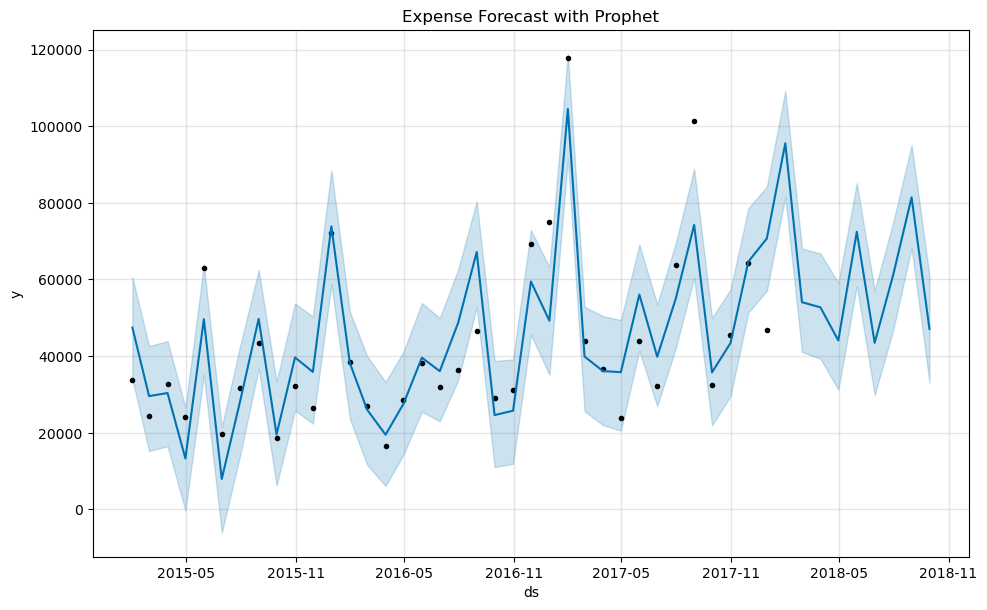

In [35]:
# Create future dates including test period
future = model.make_future_dataframe(periods=len(test_data), freq='ME')

# Generate forecast
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Expense Forecast with Prophet')
plt.show()

In [36]:
# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

predictions = forecast['yhat'][-len(test_data):].values
actuals = test_data['Total_Expenses'].values

mae = mean_absolute_error(actuals, predictions)
mape = mean_absolute_percentage_error(actuals, predictions) * 100

print(f"Mean Absolute Error: ₹{mae:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.1f}%")

Mean Absolute Error: ₹28236.46
Mean Absolute Percentage Error: 172.6%


### Step 3.6: Final Forecast

In [38]:
# Train final model on all data
final_model = Prophet()
final_df = model_df.rename(columns={'Date': 'ds', 'Total_Expenses': 'y'})
final_model.fit(final_df)

# Forecast next 6 months
future_forecast = final_model.make_future_dataframe(periods=6, freq='ME')
final_forecast = final_model.predict(future_forecast)

# View the forecast
print(final_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

22:02:53 - cmdstanpy - INFO - Chain [1] start processing
22:02:53 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat    yhat_lower     yhat_upper
45 2018-10-31  54071.357339  33888.872197   74258.496911
46 2018-11-30  62934.864356  43277.467429   82598.670684
47 2018-12-31  85066.274338  63567.219211  105355.958018
48 2019-01-31  86215.474151  65622.854053  106531.477679
49 2019-02-28  51393.126360  30284.310584   71005.825332
50 2019-03-31  50850.822255  30590.542883   71053.008801


## Phase 4: Reporting & Recommendations

#### Goal: Create actionable insights and recommendations.

### Step 4.1: Create Summary Dashboard

In [40]:
# Key metrics for dashboard
summary_metrics = {
    'Total Income': f"₹{total_income:,.2f}",
    'Total Expenses': f"₹{total_expenses:,.2f}", 
    'Net Savings': f"₹{net_savings:,.2f}",
    'Savings Rate': f"{savings_rate:.1f}%",
    'Avg Monthly Expense': f"₹{monthly_expenses.mean():,.2f}",
    'Forecast Next Month': f"₹{final_forecast['yhat'].iloc[-1]:,.2f}"
}

print("FINANCIAL SUMMARY")
print("=================")
for metric, value in summary_metrics.items():
    print(f"{metric}: {value}")

FINANCIAL SUMMARY
Total Income: ₹3,042,397.35
Total Expenses: ₹1,955,380.53
Net Savings: ₹1,087,016.82
Savings Rate: 35.7%
Avg Monthly Expense: ₹43,452.90
Forecast Next Month: ₹50,850.82


#### Personalized Recommendations

Based on the financial analysis, here are recommendations:

1. "Protect Your Exceptional Savings Rate: Your savings rate of 35.7% is outstanding and is the cornerstone of your financial health. The primary goal should be to maintain this rate, not just increase it. Guard against lifestyle inflation that could erode this key strength."

2. "Investigate the Forecasted Spending Increase: Your forecast for next month (₹50,851) is 17% higher than your average. This is your immediate action item:

* If Planned: This is a perfect use of your savings. Ensure the funds are allocated from your savings account to avoid disrupting your cash flow.

* If Unplanned: Scrutinize your recent transactions in the Food and Apparel categories (typically the most common drivers of unplanned spending increases) to identify and curb any new spending habits before they become permanent."

3. "Formalize Your Investment Strategy: With over ₹10.8 Lakhs in net savings, simply holding cash is a missed opportunity. We recommend:

* Emergency Fund: Ensure ₹2.5-5 Lakhs (6-12 months of expenses) is parked in a liquid fund or high-yield savings account.

* Goal Allocation: Define clear goals (e.g., retirement, down payment) and intentionally invest the remaining savings accordingly. Your existing investments in equity funds are a good start; consider consolidating to a few top-performing funds and setting up automatic monthly investments (SIPs) to continue building wealth systematically."

4. "Conduct a 'Subscription Audit': Review recurring payments in your subscription subcategory. Small monthly fees for unused apps or services can add up to a significant annual expense. Canceling even one or two can effortlessly boost your savings."